In [2]:
import requests  ## for getting data from a server
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram
from matplotlib.image import imread
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data = pd.read_csv('/Users/anilareddy/Downloads/project/portland/cleaned datasets/cleaned_listings.csv')
data.head()

,id,host_id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,12899.0,49682,t,1,Concordia,45.56488,-122.63418,Entire rental unit,Entire home/apt,3,...,4.93,4.94,4.98,4.99,4.99,4.93,4.94,t,1,4.01
1,27746.0,119878,t,6,Southwest Hills,45.49621,-122.74745,Entire home,Entire home/apt,2,...,4.91,4.90,4.94,4.94,4.95,4.84,4.94,f,3,1.08
2,37676.0,162158,t,3,Pearl,45.52564,-122.68273,Entire loft,Entire home/apt,3,...,4.88,4.86,4.86,4.83,4.78,4.94,4.67,f,1,0.88
3,61677.0,298438,f,2,Reed,45.48784,-122.62806,Private room in home,Private room,3,...,4.73,4.58,4.43,4.83,4.91,4.65,4.59,t,1,0.83
4,61893.0,300391,t,1,Goose Hollow,45.52258,-122.69955,Entire condo,Entire home/apt,2,...,5.00,5.00,5.00,4.95,5.00,5.00,4.95,f,1,0.27


Text(0.5, 1.0, 'Price against Number of reviews')

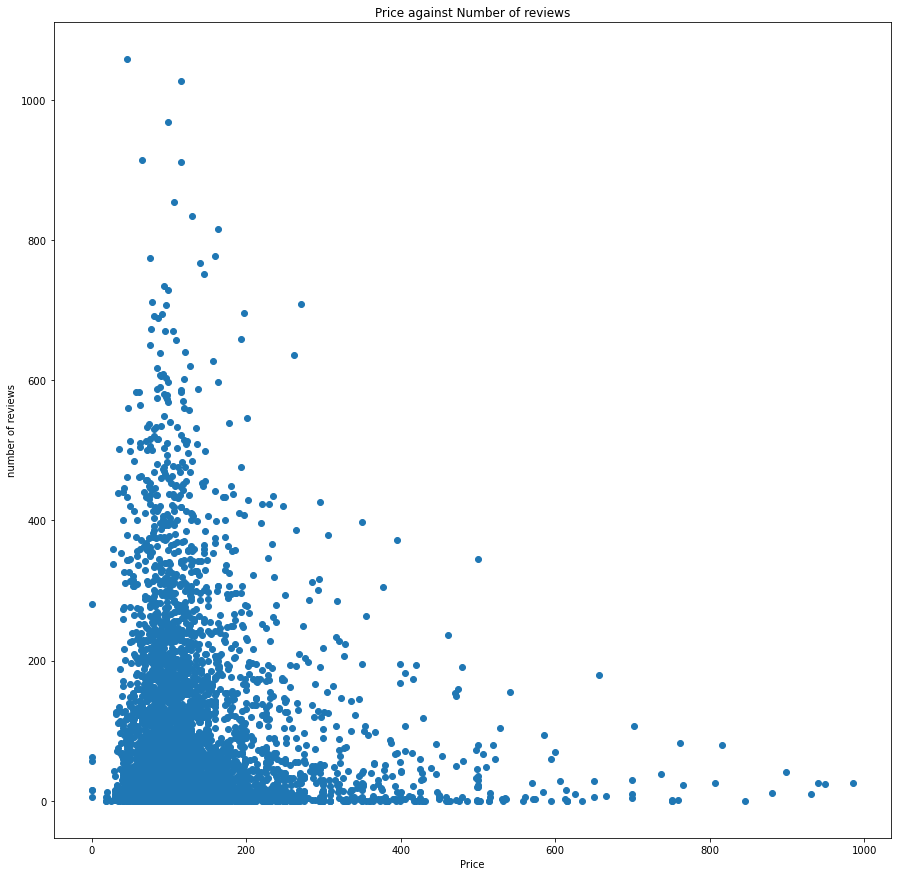

In [4]:
plt.figure(figsize=(15,15))
plt.scatter(data.loc[:, "price"], data.loc[:, "number_of_reviews"])
plt.xlabel('Price')
plt.ylabel('number of reviews')
plt.title('Price against Number of reviews')

In [5]:
data = data.fillna(0)
data = data.set_index('neighbourhood_cleansed')

In [6]:
df_p = pd.DataFrame(data.loc["Pearl", ["price","number_of_reviews"]])

In [7]:
pip install KMeans

Note: you may need to restart the kernel to use updated packages.


In [8]:
df_p

,price,number_of_reviews
neighbourhood_cleansed,,
Pearl,140,130
Pearl,150,18
Pearl,99,20
Pearl,119,561
Pearl,120,37
...,...,...
Pearl,112,0
Pearl,170,0
Pearl,198,1


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


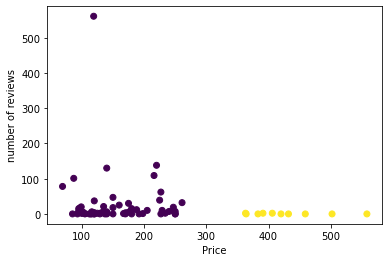

[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


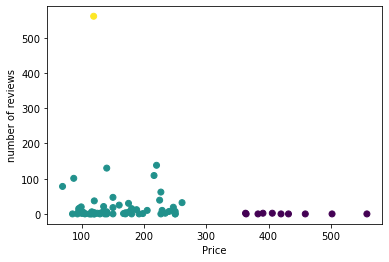

[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


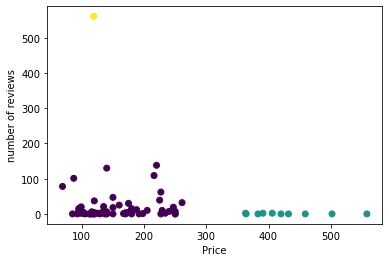

Silhouette Score for k = 2 
 0.6879635407885415
Silhouette Score for k = 3 
 0.7094866009245754
Silhouette Score for k = 4 
 0.5316504894639689


In [25]:
My_KMean= KMeans(n_clusters=2)
My_KMean.fit(df_p)
My_labels=My_KMean.predict(df_p)
print(My_labels)
plt.scatter(df_p['price'], df_p['number_of_reviews'], c=My_labels)
plt.xlabel('Price')
plt.ylabel('number of reviews')
plt.show()

My_KMean2 = KMeans(n_clusters=3).fit(preprocessing.normalize(df_p))
My_KMean2.fit(df_p)
My_labels2=My_KMean2.predict(df_p)
print(My_labels2)
plt.scatter(df_p['price'], df_p['number_of_reviews'], c=My_labels2)
plt.xlabel('Price')
plt.ylabel('number of reviews')
plt.show()

My_KMean3 = KMeans(n_clusters=4).fit(preprocessing.normalize(df_p))
My_KMean2.fit(df_p)
My_labels3=My_KMean2.predict(df_p)
print(My_labels2)
plt.scatter(df_p['price'], df_p['number_of_reviews'], c=My_labels3)
plt.xlabel('Price')
plt.ylabel('number of reviews')
plt.show()


My_KMean= KMeans(n_clusters=2)
My_KMean3.fit(df_p)
My_labels3=My_KMean3.predict(df_p)
print("Silhouette Score for k = 2 \n",silhouette_score(df_p, My_labels))

My_KMean2= KMeans(n_clusters=3)
My_KMean3.fit(df_p)
My_labels3=My_KMean3.predict(df_p)
print("Silhouette Score for k = 3 \n",silhouette_score(df_p, My_labels2))

My_KMean3= KMeans(n_clusters=4)
My_KMean3.fit(df_p)
My_labels3=My_KMean3.predict(df_p)
print("Silhouette Score for k = 4 \n",silhouette_score(df_p, My_labels3))


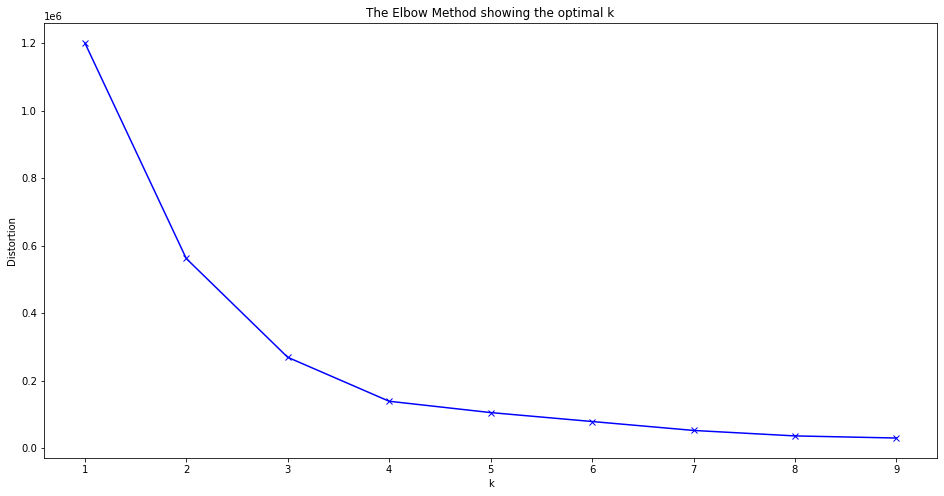

In [16]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_p)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

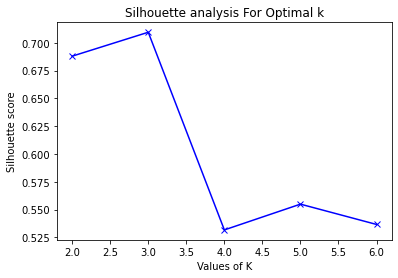

In [23]:
range_n_clusters = [2,3,4,5,6]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_p)
    cluster_labels = kmeans.labels_
 # silhouette score
    silhouette_avg.append(silhouette_score(df_p, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()